In [1]:

What to Maximize:
Customer satisfaction: Positive review sentiment and feedback.
Sales conversion rate: Higher percentage of visitors buying after reading reviews.
    
What to Minimize:
Negative reviews: Reduce the volume of negative sentiment and feedback.
Product returns: Decrease the number of customers returning the phone.
Customer churn: Minimize customers switching to competitor brands due to dissatisfaction.

Constraints:
Budget for customer support or outreach (to address negative reviews).
Time for optimizing product listings (using feedback from reviews).

In [ ]:
#First we will go for web scraping .
#We will scrap the reviews of the phone S24 Ultra.
#We will web scarp review of the phone S24 Ultra  from which we will scrap 1.Customer Name , 2.Raview_title , 3. Body of the Review

In [99]:
#Defining the libraries that will be required for web scraping  
import pandas as pd
import bs4
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url="https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/dp/B0BT9FDZ8N"

In [6]:
page=requests.get(url)
page
page.content
soup=bs(page.content,"html.parser")
print(soup.prettify)
#By requests.get we will get access to the review page of the movie

<bound method Tag.prettify of <!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01e5ncglxyL.css,01lF2n-pPaL.css,41rAzWzSmAL.css,31Zhso255KL.css,01JxBjM51UL.css,11GEPqXartL.css,01qPl4hxayL.css,01ti0q+221L.css,413Vvv3GONL.css,11TI

In [8]:
#Here We are going to extract Name of customer
names=soup.find_all('span',class_="a-profile-name")
names


[<span class="a-profile-name">Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256GB Storage)</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Vivek hansen</span>,
 <span class="a-profile-name">D B</span>,
 <span class="a-profile-name">Rahul 🤨</span>,
 <span class="a-profile-name">Rahul 🤨</span>,
 <span class="a-profile-name">itsmeShubham</span>,
 <span class="a-profile-name">itsmeShubham</span>,
 <span class="a-profile-name">Pritesh Kumar</span>,
 <span class="a-profile-name">Pritesh Kumar</span>,
 <span class="a-profile-name">shashi kant singh</span>,
 <span class="a-profile-name">shashi kant singh</span>,
 <span class="a-profile-name">Apurva Singha</span>,
 <span class="a-profile-name">Hatim</span>,
 <span class="a-profile-name">Randa A.</span>]

In [101]:
#Now we will clean the customer name and will balance the length
cust_names=[]
for i in range(0,len(names)):
    cust_names.append(names[i].get_text())
cust_names
len(cust_names)
cust_names.pop(-1)
cust_names.pop(-1)
cust_names.pop(-1)
cust_names.pop(-1)
len(cust_names)


16

In [88]:
title=soup.find_all('a',class_='review-title')
#We have extracted title but it is not clean now we will clean the title
review_title=[]
for i  in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title
review_title[:]=[title.strip('\n') for title in review_title]
review_title



['5.0 out of 5 stars\nGo for it',
 '5.0 out of 5 stars\nBest Android Phone With superb Cameras, and Excellent Performance',
 '5.0 out of 5 stars\nBest Phone',
 '4.0 out of 5 stars\nSmooth Upgrade | Flagship is 🔥',
 '5.0 out of 5 stars\nPHONE PERFORMANCE',
 '5.0 out of 5 stars\nFlagship Experience',
 '5.0 out of 5 stars\nMobile Phone',
 '4.0 out of 5 stars\nEverything is good except battery']

In [90]:
#Balancing the length of Review Title
len(review_title)
review_title.append('')
review_title.append('')
review_title.append('')
review_title.append('')
len(review_title)

12

In [92]:
#Now Extracting the Bosy of review
reviews=soup.find_all("div",class_="a-row a-spacing-small review-data")
reviews
review_body=[]
for i in range(0,len(reviews)):
    review_body.append(reviews[i].get_text())
review_body
review_body=[ reviews.strip('\n\n')for reviews in review_body]
review_body.append('The design is sleek and premium with a polished metal frame and glass back. It feels solid in hand, though it’s slightly heavier due to its large size. The curved edges and near-bezel-less display give it a modern, elegant look.Display: The 6.8-inch Dynamic AMOLED 2X display is stunning. Colors are vibrant, blacks are deep, and it offers fantastic brightness even in direct sunlight. The 120Hz refresh rate makes scrolling smooth and the overall experience buttery')
review_body.append('And you will get 4 years of Android Updates and Security updates and that is an amazing thingThe only complaint is, Amazon delivered this phone in a thin plastic cover which was damaged cut open almost. Amazon should take care of these things. We r buying expensive things online and You get a parcel cut open, then its not acceptable')
review_body.append ('Its real value for money .Looks awesome and stylish . Camera , voice quality and screen is excellent.It equal to the high end models at half the price. Got all the features required to run all the latest apps.')
review_body



["Samsung S23 Ultra ReviewS23 Ultra is a true powerhouse and an impressive flagship device. Here’s a breakdown of the key features and performance:Design & Build: The design is sleek and premium with a polished metal frame and glass back. It feels solid in hand, though it’s slightly heavier due to its large size. The curved edges and near-bezel-less display give it a modern, elegant look.Display: The 6.8-inch Dynamic AMOLED 2X display is stunning. Colors are vibrant, blacks are deep, and it offers fantastic brightness even in direct sunlight. The 120Hz refresh rate makes scrolling smooth and the overall experience buttery.Performance: Powered by the Snapdragon 8 Gen 2 chipset (or Exynos, depending on the region), this phone can handle anything you throw at it. Whether gaming, multitasking, or using heavy apps, the performance remains snappy without any lags.Camera: The highlight of the S23 Ultra is its camera setup. The 200MP main sensor captures incredible detail, and the photos in go

In [36]:
len(review_body) #length of review Body

12

In [97]:
#Create a Dataframe
import pandas as pd
df=pd.DataFrame()
df['Customer_Name']=cust_names
df['Review_Title']=review_title
df['Review_Body']=review_body
df


,Customer_Name,Review_Title,Review_Body
0,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",5.0 out of 5 stars\nGo for it,Samsung S23 Ultra ReviewS23 Ultra is a true po...
1,Amazon Customer,5.0 out of 5 stars\nBest Android Phone With su...,S 23 Ultra 256 GB Model is an Extraordinary An...
2,Amazon Customer,5.0 out of 5 stars\nBest Phone,The Samsung S23 Ultra is a stylish phone. It h...
3,Vivek hansen,4.0 out of 5 stars\nSmooth Upgrade | Flagship ...,"Overall build quality is amazing, I upgraded f..."
4,D B,5.0 out of 5 stars\nPHONE PERFORMANCE,"Awesome phone, very quick and snappy, best al..."
5,Rahul 🤨,5.0 out of 5 stars\nFlagship Experience,The media could not be loa...
6,Rahul 🤨,5.0 out of 5 stars\nMobile Phone,Its real value for money .Looks awesome and st...
7,itsmeShubham,4.0 out of 5 stars\nEverything is good except ...,I love this phone it's very good but battery d...
8,itsmeShubham,,Sealed and new 👌\nRead more
9,Pritesh Kumar,,The design is sleek and premium with a polishe...


In [103]:
#now create csv file
df.to_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\Amazon_Reviews.csv",index=True)

In [105]:
#first we will check data dictionary

In [109]:
set(df["Review_Title"])
#looking at the output we can say that it is Qualitative Nominal Type of Data

{'',
 '4.0 out of 5 stars\nEverything is good except battery',
 '4.0 out of 5 stars\nSmooth Upgrade | Flagship is 🔥',
 '5.0 out of 5 stars\nBest Android Phone With superb Cameras, and Excellent Performance',
 '5.0 out of 5 stars\nBest Phone',
 '5.0 out of 5 stars\nFlagship Experience',
 '5.0 out of 5 stars\nGo for it',
 '5.0 out of 5 stars\nMobile Phone',
 '5.0 out of 5 stars\nPHONE PERFORMANCE'}

In [111]:
set(df["Review_Body"])
#it is Qualitative nominal Data

{"                    The media could not be loaded.\n                \n\n\n\n\xa01. The camera system is impressive, but it's essential to understand which settings and modes to use for optimal results.2. The device exhibits minimal heating issues, even with extended use.3. Battery life comfortably lasts over a day with regular usage. However, it requires charging if heavy game for 3 hours4. Purchased at ₹72,000 with all offers included, without an exchange. It represents excellent value for money.5. The phone's size may initially seem large, but it only takes 3-4 days to adjust comfortably.6. Charger not in box is negative con7. Charging takes over an hr8. Good Ai features\nRead more",
 'And you will get 4 years of Android Updates and Security updates and that is an amazing thingThe only complaint is, Amazon delivered this phone in a thin plastic cover which was damaged cut open almost. Amazon should take care of these things. We r buying expensive things online and You get a parcel 

In [115]:
#now we have created Dataset now we will go for Data Preprocessing

In [117]:
df.shape #there are 12 rows and three columns

(12, 3)

In [119]:
df.columns #There are three columns named as 'Customer_Name','Review','Review_Body'

Index(['Customer_Name', 'Review_Title', 'Review_Body'], dtype='object')

In [121]:
#first we will check summary of data
df.describe()

,Customer_Name,Review_Title,Review_Body
count,12,12,12
unique,8,9,12
top,Amazon Customer,,Samsung S23 Ultra ReviewS23 Ultra is a true po...
freq,2,4,1


In [123]:
#info summary
df.info()
#from this we came to know total columns and thier names , index , datatypes ,memory usage,is there any null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_Name  12 non-null     object
 1   Review_Title   12 non-null     object
 2   Review_Body    12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


In [127]:
#Now creating a word cloud 
from wordcloud import WordCloud
text=df["Review_Title"]     #first creating a word cloud for Review_title

# Concatenate all text into one string
text = " ".join(Review_title for Review_title in text)

# Generate Word Cloud
wordcloud_Review_title = WordCloud(width=800, height=400, background_color='white').generate(text)

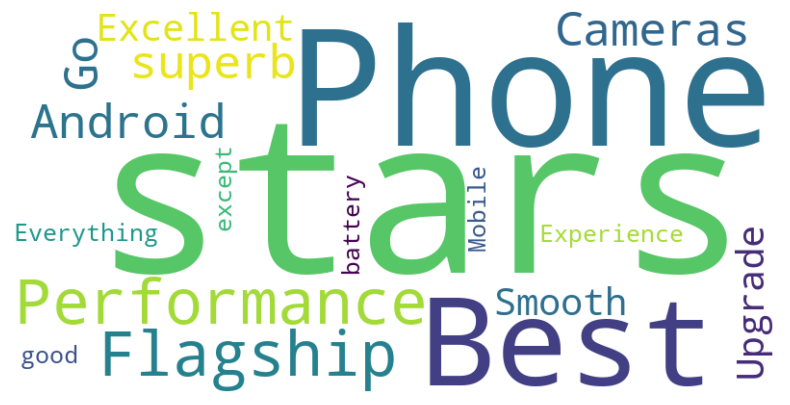

In [129]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review_title, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [131]:
text2=df["Review_Body"]     #first creating a word cloud for Reviews

# Concatenate all text into one string
text2 = " ".join(Review for Review in text2)

# Generate Word Cloud
wordcloud_Review = WordCloud(width=800, height=400, background_color='white').generate(text2)

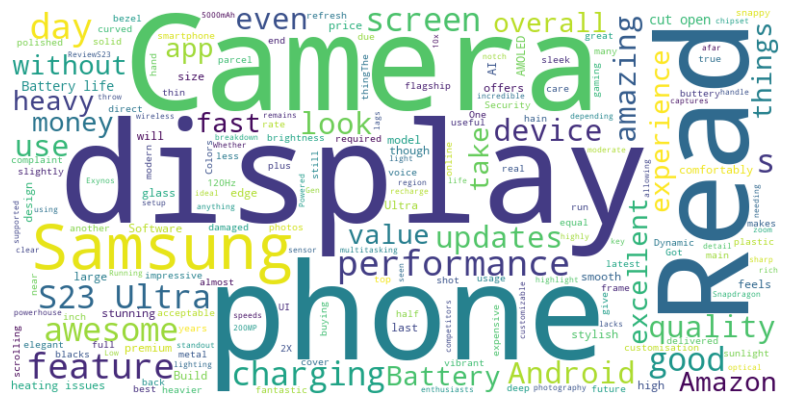

In [133]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [135]:
#Sentiment Analysis
import pandas as pd
from textblob import TextBlob
sent="This is excellent movie"
pol=TextBlob(sent).sentiment.polarity
pol
#from this polarity we came to now that word is positive or negative
#Positive Sentiment: Polarity > 0
#Negative Sentiment: Polarity < 0
#Neutral Sentiment: Polarity = 0

1.0

In [139]:
df=pd.read_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\Amazon_Reviews.csv")
df.head()
df['polarity']=df['Review_Body'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
df['polarity']

#From this we came to know sentiment polarity of all the reviews from the data

0     0.262584
1     0.256742
2     0.500000
3     0.196083
4     0.731481
5     0.194286
6     0.336667
7     0.542500
8     0.318182
9     0.143080
10   -0.085714
11    0.313333
Name: polarity, dtype: float64

In [ ]:
#Benefits and Impact of Solution :
#                                By analyzing reviews of the movie "S24," businesses can understand what people liked or didn’t like.
#                                This helps them improve future qulity of phones, create better ads, and make decisions based on what the audience enjoys.
#                                It also helps them predict how successful SAles of phone and adjust their marketing to attract customers.